# Step 1: Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings("ignore")

In [2]:
df_2019 = pd.read_excel("DATAv3.xlsx", sheet_name="2019")
df_2020 = pd.read_excel("DATAv3.xlsx", sheet_name="2020")
df_2021 = pd.read_excel("DATAv3.xlsx", sheet_name="2021")
df_2022 = pd.read_excel("DATAv3.xlsx", sheet_name="2022")
df_2023 = pd.read_excel("DATAv3.xlsx", sheet_name="2023")

In [3]:
merged_df = pd.concat([df_2019, df_2020], axis=0)
merged_df = pd.concat([merged_df, df_2021], axis=0)
merged_df = pd.concat([merged_df, df_2022], axis=0)
merged_df = pd.concat([merged_df, df_2023], axis=0)

In [4]:
merged_df

,CODE,NAME,STOCK EXCHANGE,YEAR,TARGET,EBIT,EBITDA,TOTAL EQUITY/TOTAL ASSETS,EPS,CASH/TOTAL CURRENT ASSETS,...,LONG-TERM ASSETS/TOTAL ASSETS,QUICK RATIO,Market Value of Total Equity / Book Values of Total Liabilities,Sales/Total Assets,EBIT/Total Assets,Retain Earnings/Total Assets,Working Capitals/Total Asset,ROIC,AGE,NET INCOME/TOTAL ASSET
0,AAA,CTCP Nhựa An Phát Xanh,HOSE,2019,1.0,827750342.0,1.080664e+09,0.366437,2305.85,0.000059,...,0.606693,0.95,0.459455,1.161603,1.036313e-04,8.552439e-05,0.000217,9.39,17.0,0.057649
1,AAM,CTCP Thủy sản MeKong,HOSE,2019,0.0,10414967.0,1.484997e+07,0.325193,652.42,0.000010,...,1.651718,4.89,8.312865,0.059104,2.729273e-06,5.880444e-06,0.000045,3.52,17.0,0.036521
2,AAT,CTCP Tập Đoàn Tiên Sơn Thanh Hóa,HOSE,2019,NaN,36378558.0,7.810610e+07,0.499538,NaN,0.000030,...,-0.738424,NaN,NaN,3.323557,4.079215e-04,7.052575e-04,NaN,5.42,24.0,0.035194
3,AAV,CTCP AAV Group,HNX,2019,1.0,43865569.0,5.029060e+07,0.484581,1897.92,0.000075,...,2.253865,1.01,1.300773,0.640725,5.125428e-05,4.238278e-05,0.000210,8.07,9.0,0.049627
4,ABR,CTCP Đầu tư Nhãn hiệu Việt,HOSE,2019,NaN,10817428.0,1.171242e+07,0.596306,NaN,0.001202,...,457.915445,7.63,0.751257,0.000344,1.377717e-07,1.491623e-07,NaN,6.84,7.0,0.032497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,VTZ,CTCP Sản xuất và Thương mại Nhựa Việt Thành,HNX,2023,1.0,94665623.0,1.267323e+08,29.13,623.12,4.310000,...,13.630000,0.69,0.288256,1.577685,5.621932e-05,3.279423e-05,0.000178,6.46,12.0,0.014736
647,WCS,CTCP Bến xe Miền Tây,HNX,2023,0.0,83447381.0,8.773185e+07,71.40,23804.39,17.260000,...,10.040000,3.32,5.720098,0.493512,2.936169e-04,6.260013e-04,0.000628,33.74,17.0,0.233922
648,X20,CTCP X20,HNX,2023,0.0,26340030.0,5.723843e+07,43.92,766.05,14.590000,...,35.420000,0.49,0.490126,1.766489,4.464977e-05,1.467842e-04,0.000091,7.67,15.0,0.033479
649,YBM,CTCP Khoáng sản Công nghiệp Yên Bái,HOSE,2023,NaN,NaN,NaN,32.02,870.77,6.740000,...,43.530000,0.71,0.325859,1.010756,NaN,NaN,NaN,NaN,8.0,0.023341


# Step 2: Data Preprocessing

## 2.1 Conver object to float

In [5]:
def convert_string_to_float(x):
    if type(x) == str:
        x = x.replace("(", "")
        x = x.replace(")", "")
        x = x.replace(",", "")
        return float(x)
    return x

In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3303 entries, 0 to 650
Data columns (total 21 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   CODE                                                             3303 non-null   object 
 1   NAME                                                             3303 non-null   object 
 2   STOCK EXCHANGE                                                   3303 non-null   object 
 3   YEAR                                                             3303 non-null   int64  
 4   TARGET                                                           3009 non-null   float64
 5   EBIT                                                             3070 non-null   float64
 6   EBITDA                                                           3058 non-null   float64
 7   TOTAL EQUITY/TOTAL ASSETS                       

In [7]:
# merged_df['EBIT'] = merged_df['EBIT'].apply(lambda x: convert_string_to_float(x))
# merged_df['EBITDA'] = merged_df['EBITDA'].apply(lambda x: convert_string_to_float(x))
merged_df['TOTAL EQUITY/TOTAL ASSETS'] = merged_df['TOTAL EQUITY/TOTAL ASSETS'].apply(lambda x: convert_string_to_float(x))

## 2.2 Handling mising value

Biểu đồ số lượng giá trị bị thiếu đối với mỗi cột giá trị

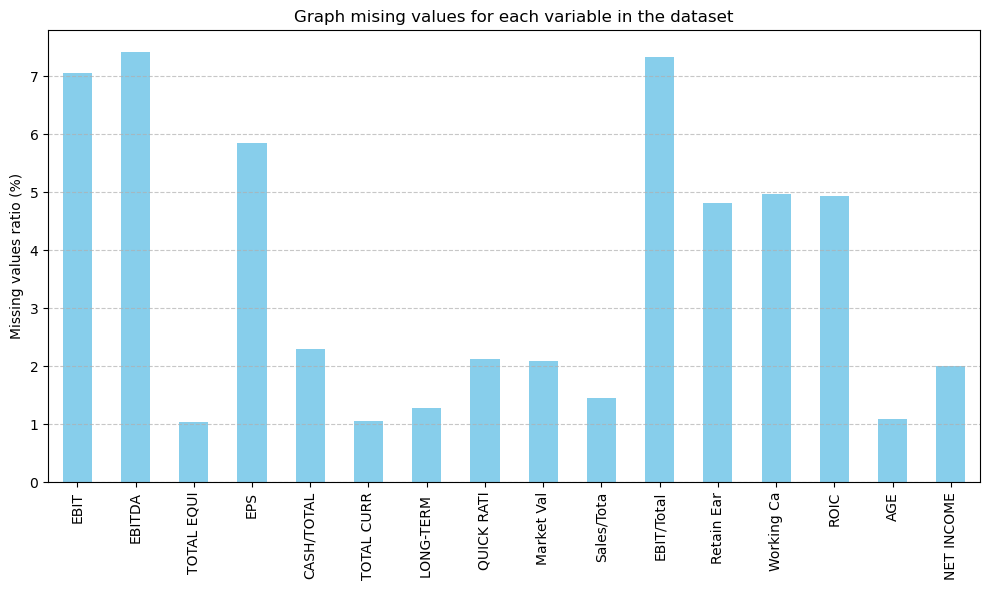

In [8]:
# Tính phần trăm giá trị thiếu cho mỗi cột

missing_percentage = merged_df.iloc[:, 5:].isnull().mean() * 100

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Graph mising values for each variable in the dataset')
column_names_10_chars = [col[:10] for col in missing_percentage.index]
plt.xticks(ticks=np.arange(len(missing_percentage)), labels=column_names_10_chars, rotation=90)
plt.ylabel('Missing values ratio (%)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




*Nhận xét:* Những cột có nhiều giá trị bị thiếu nhất là 'TARGET', 'EPS', 'ROIC' 

In [9]:
merged_df.isna().sum()

CODE                                                                 0
NAME                                                                 0
STOCK EXCHANGE                                                       0
YEAR                                                                 0
TARGET                                                             294
EBIT                                                               233
EBITDA                                                             245
TOTAL EQUITY/TOTAL ASSETS                                           34
EPS                                                                193
CASH/TOTAL CURRENT ASSETS                                           76
TOTAL CURRENT ASSET/TOTAL ASSET                                     35
LONG-TERM ASSETS/TOTAL ASSETS                                       42
QUICK RATIO                                                         70
Market Value of Total Equity / Book Values of Total Liabilities     69
Sales/

In [10]:
for i in range(2019, 2024):
    df_name = f"df_{i}"
    target_column = f"{df_name}['TARGET']"
    missing_values = globals()[df_name]['TARGET'].isna().sum()
    print(f"Missing values in {df_name}: {missing_values}")

Missing values in df_2019: 73
Missing values in df_2020: 48
Missing values in df_2021: 43
Missing values in df_2022: 44
Missing values in df_2023: 86


*Nhận xét:* Những dòng bị thiếu giá trị ở cột TARGET thường cũng thiếu ở những cột còn lại => Xóa đi những dòng dữ liệu bị thiếu ở cột TARGET

In [11]:
merged_df.dropna(subset=['TARGET'], inplace=True)

Xóa những dòng dữ liệu bị thiếu ít giá trị ở một số cột

In [12]:
merged_df.dropna(subset=['EBITDA',
                         'CASH/TOTAL CURRENT ASSETS',
                         'TOTAL CURRENT ASSET/TOTAL ASSET',
                         'Working Capitals/Total Asset',
                         'LONG-TERM ASSETS/TOTAL ASSETS',
                         'Market Value of Total Equity / Book Values of Total Liabilities',
                         'Working Capitals/Total Asset'], inplace=True)


Xóa những dòng bị thiếu ở cả hai cột EPS và ROIC

In [13]:
merged_df.dropna(subset=['EPS', 'ROIC'], how='all', inplace=True)


Lọc ra những giá trị thiếu ở EPS và ROIC

In [14]:
df_na_EPS = merged_df[merged_df['EPS'].isna()]
df_na_ROIC = merged_df[merged_df['ROIC'].isna()]
merged_df_not_na = merged_df.dropna()

In [15]:
len(df_na_EPS), len(df_na_ROIC), len(merged_df_not_na)

(62, 7, 2919)

Xác định các biến đặc trưng và các biến mục tiêu

In [16]:
feature_merged_df_not_na = merged_df_not_na.drop(['CODE', 'NAME', 'STOCK EXCHANGE', 'YEAR', 'TARGET'], axis=1)
feartures_EPS = feature_merged_df_not_na.drop(['EPS'], axis=1)
target_EPS = feature_merged_df_not_na['EPS']
feature_ROIC = feature_merged_df_not_na.drop(['ROIC'], axis=1)
target_ROIC = feature_merged_df_not_na['ROIC']

In [17]:
from sklearn.ensemble import RandomForestRegressor


# Tính toán giá trị bias
mean_target_EPS = target_EPS.mean()
mean_target_ROIC = target_ROIC.mean()
# 10% giá trị trung bình của cột target_column
bias_EPS = 0.1 * mean_target_EPS  
bias_ROIC = 0.1 * mean_target_ROIC


# Xây dựng mô hình Random Forest
model1 = RandomForestRegressor()
model2 = RandomForestRegressor()

model1.fit(feartures_EPS, target_EPS)
model2.fit(feature_ROIC, target_ROIC)



RandomForestRegressor()

Dự đoán giá trị bị thiếu bằng thuật toán Random forest + bias
Bias là một lượng random 10% giá trị trung bình của cột

In [18]:
# Dự đoán giá trị thiếu
predicted_values_EPS = model1.predict(df_na_EPS.drop(['CODE', 'NAME', 'STOCK EXCHANGE', 'YEAR', 'TARGET', 'EPS'], axis=1))
predicted_values_ROIC = model2.predict(df_na_ROIC.drop(['CODE', 'NAME', 'STOCK EXCHANGE', 'YEAR', 'TARGET', 'ROIC'], axis=1))

# Thêm bias ngẫu nhiên vào giá trị dự đoán
random_bias_EPS = np.random.uniform(-bias_EPS, bias_EPS, len(predicted_values_EPS))
random_bias_ROIC = np.random.uniform(-bias_ROIC, bias_ROIC, len(predicted_values_ROIC))

predicted_values_with_bias_EPS = predicted_values_EPS + random_bias_EPS
predicted_values_with_bias_ROIC = predicted_values_ROIC + random_bias_ROIC

# Điền giá trị thiếu vào dữ liệu gốc
df_na_EPS['EPS'] = predicted_values_with_bias_EPS
df_na_ROIC['ROIC'] = predicted_values_with_bias_ROIC

# Kết hợp dữ liệu đã biết và dữ liệu đã dự đoán lại
final_data = pd.concat([merged_df_not_na, df_na_EPS], axis=0)
final_data = pd.concat([final_data, df_na_ROIC], axis=0)


In [19]:
final_data.isna().sum()

CODE                                                               0
NAME                                                               0
STOCK EXCHANGE                                                     0
YEAR                                                               0
TARGET                                                             0
EBIT                                                               0
EBITDA                                                             0
TOTAL EQUITY/TOTAL ASSETS                                          0
EPS                                                                0
CASH/TOTAL CURRENT ASSETS                                          0
TOTAL CURRENT ASSET/TOTAL ASSET                                    0
LONG-TERM ASSETS/TOTAL ASSETS                                      0
QUICK RATIO                                                        0
Market Value of Total Equity / Book Values of Total Liabilities    0
Sales/Total Assets                

## 2.3 Describe Static

In [20]:
final_data.describe()

,YEAR,TARGET,EBIT,EBITDA,TOTAL EQUITY/TOTAL ASSETS,EPS,CASH/TOTAL CURRENT ASSETS,TOTAL CURRENT ASSET/TOTAL ASSET,LONG-TERM ASSETS/TOTAL ASSETS,QUICK RATIO,Market Value of Total Equity / Book Values of Total Liabilities,Sales/Total Assets,EBIT/Total Assets,Retain Earnings/Total Assets,Working Capitals/Total Asset,ROIC,AGE,NET INCOME/TOTAL ASSET
count,2988.000000,2988.000000,2.988000e+03,2.988000e+03,2988.000000,2.988000e+03,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000,2988.000000
mean,2020.978246,0.456827,4.743471e+08,6.288163e+08,208.540571,1.641796e+04,5.380217,26.484465,19.157256,2.069331,3.661888,2.152910,0.000211,0.000323,0.000397,8.502463,21.502008,0.051845
std,1.391974,0.498216,2.474710e+09,2.946144e+09,2998.202022,1.533317e+05,11.529661,44.896362,64.283276,4.879625,11.566086,13.451079,0.002126,0.002839,0.002395,11.810940,73.580742,0.073982
min,2019.000000,0.000000,-1.215827e+10,-1.010885e+10,-0.208426,-3.286260e+05,0.000000,0.000347,-0.999295,0.000000,0.018824,0.000567,-0.002989,-0.030181,-0.031335,-408.490000,2.000000,-0.511396
25%,2020.000000,0.000000,1.908147e+07,2.872234e+07,0.380308,3.614275e+02,0.000057,0.536984,0.355280,0.650000,0.508367,0.332264,0.000032,0.000048,0.000066,3.800000,14.000000,0.011760
50%,2021.000000,0.000000,6.673567e+07,9.112991e+07,0.591781,1.189505e+03,0.000348,0.904174,1.852811,1.040000,1.156722,0.807593,0.000066,0.000116,0.000196,7.165000,17.000000,0.038793
75%,2022.000000,1.000000,2.388700e+08,3.202305e+08,0.863159,2.589740e+03,5.152500,57.270000,28.855000,1.800000,2.853176,1.469635,0.000114,0.000243,0.000401,11.965000,22.000000,0.080007
max,2023.000000,1.000000,5.053114e+10,5.132770e+10,45639.000000,2.722094e+06,95.560000,1418.490751,2877.345934,146.920000,271.851641,440.403428,0.079605,0.113088,0.078015,73.690000,2022.000000,0.473805


In [21]:
# final_data = merged_df
# final_data

## 2.4 Data Normalization

*Nhận xét* : 
<p>Kết quả thống kê mô tả sơ bộ trên các biến numeric cho thấy các biến khác biệt nhau về đơn vị lớn. Trung bình thấp nhất là 2.130811 và cao nhất lên tới 2.766288e+11. Như vậy khả năng cao chúng ta sẽ cần phải chuẩn hoá các biến để loại bỏ sự khác biệt về đơn vị trước khi xây dựng mô hình.</p>

number of numeric field:  16


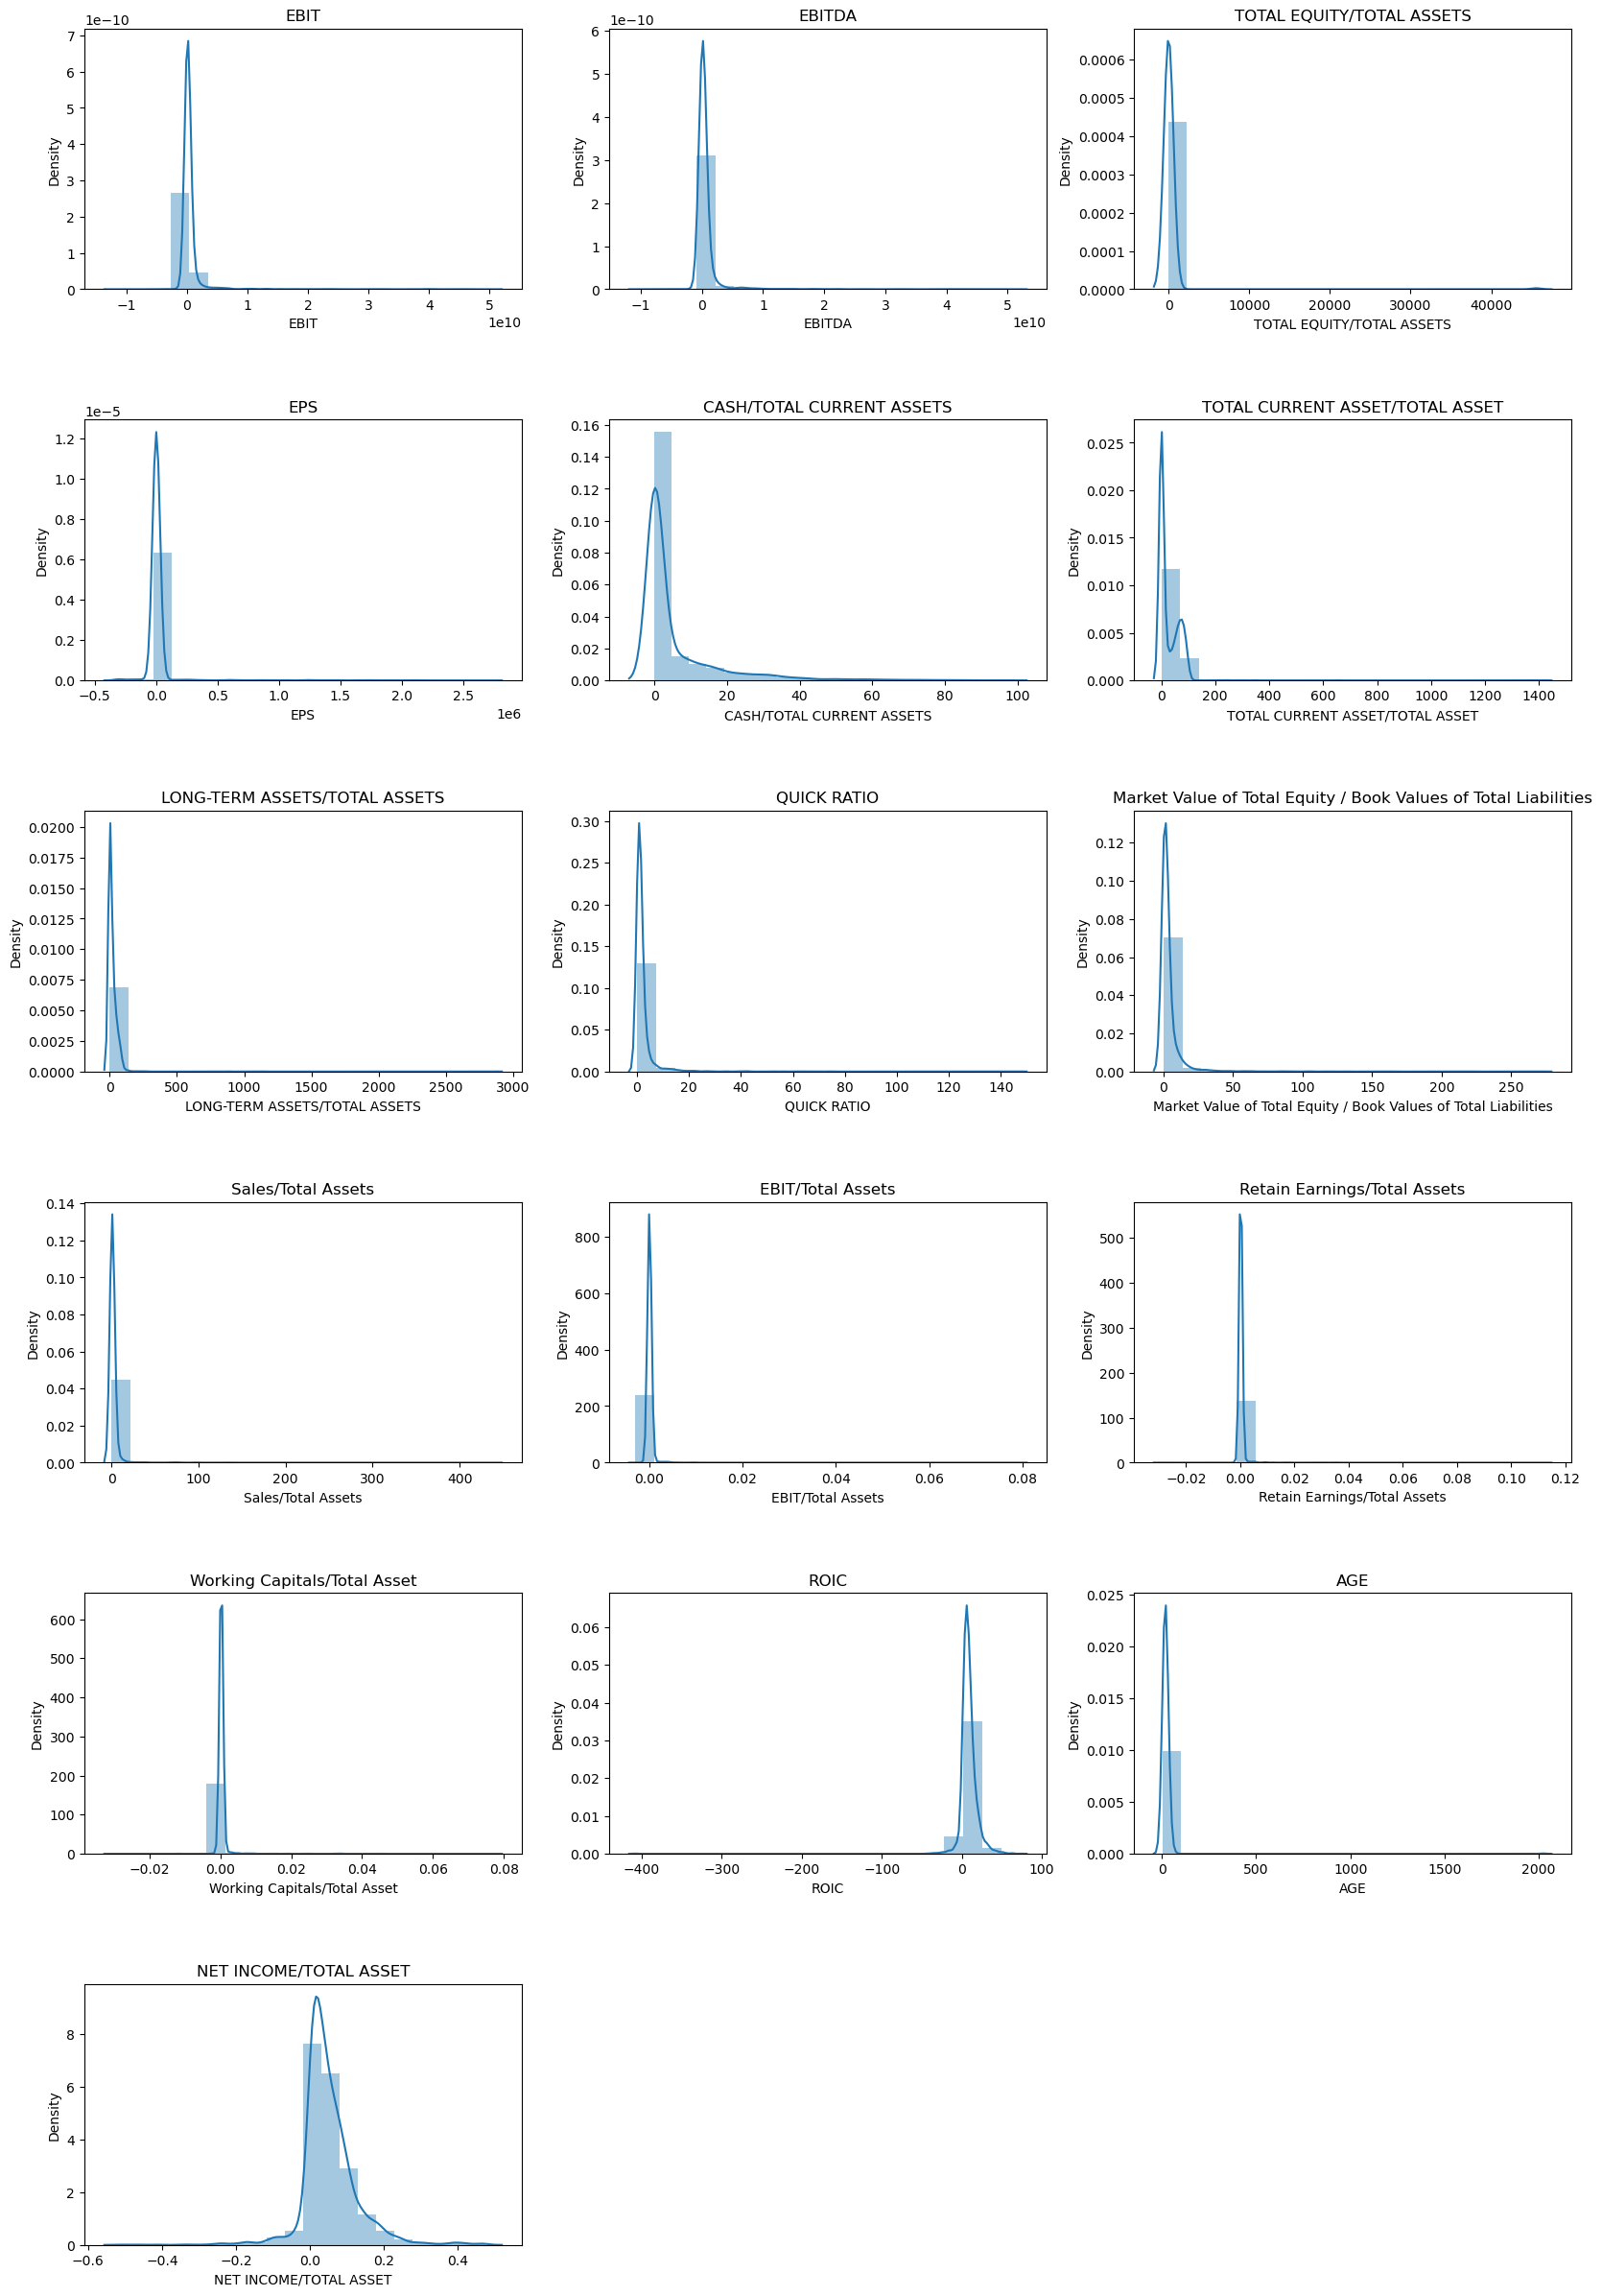

In [22]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

numeric_cols = final_data.select_dtypes(include=['float','int']).columns

numeric_cols = numeric_cols.drop('YEAR')
numeric_cols = numeric_cols.drop('TARGET')

def _plot_numeric_classes(final_data, col, bins=20, hist=True, kde=True):
    sns.distplot(final_data[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def _distribution_numeric(final_data, numeric_cols, row=6, col=3, figsize=(20, 30), bins = 20):
    '''
    numeric_cols: list các tên cột
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    bins: số lượng bins phân chia trong biểu đồ distribution
    '''
    print('number of numeric field: ', len(numeric_cols))
    assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(final_data, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break

_distribution_numeric(final_data, numeric_cols)

Lable encode cho cột STOCK EXCHANGE

In [23]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Mã hóa cột "STOCK_EXCHANGE"
final_data['STOCK EXCHANGE'] = label_encoder.fit_transform(final_data['STOCK EXCHANGE'])


In [24]:
regression_fearture = final_data.columns.tolist()
regression_fearture.remove('CODE')
regression_fearture.remove('NAME')
regression_fearture.remove('YEAR')
regression_fearture.remove('STOCK EXCHANGE')
regression_fearture.remove('TARGET')
regression_fearture.remove('AGE')
regression_fearture

['EBIT',
 'EBITDA',
 'TOTAL EQUITY/TOTAL ASSETS',
 'EPS',
 'CASH/TOTAL CURRENT ASSETS',
 'TOTAL CURRENT ASSET/TOTAL ASSET',
 'LONG-TERM ASSETS/TOTAL ASSETS',
 'QUICK RATIO',
 'Market Value of Total Equity / Book Values of Total Liabilities',
 'Sales/Total Assets',
 'EBIT/Total Assets',
 'Retain Earnings/Total Assets',
 'Working Capitals/Total Asset',
 'ROIC',
 'NET INCOME/TOTAL ASSET']

In [25]:
from joblib import dump
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
final_data[regression_fearture] = scaler.fit_transform(final_data[regression_fearture])
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [26]:
# final_data[regression_fearture] = final_data[regression_fearture].apply(lambda x: x / np.sqrt(np.sum(x**2)), axis=0)

In [27]:
final_data.describe()

,STOCK EXCHANGE,YEAR,TARGET,EBIT,EBITDA,TOTAL EQUITY/TOTAL ASSETS,EPS,CASH/TOTAL CURRENT ASSETS,TOTAL CURRENT ASSET/TOTAL ASSET,LONG-TERM ASSETS/TOTAL ASSETS,QUICK RATIO,Market Value of Total Equity / Book Values of Total Liabilities,Sales/Total Assets,EBIT/Total Assets,Retain Earnings/Total Assets,Working Capitals/Total Asset,ROIC,AGE,NET INCOME/TOTAL ASSET
count,2988.000000,2988.000000,2988.000000,2.988000e+03,2.988000e+03,2.988000e+03,2.988000e+03,2.988000e+03,2.988000e+03,2.988000e+03,2.988000e+03,2.988000e+03,2988.000000,2988.000000,2.988000e+03,2.988000e+03,2.988000e+03,2988.000000,2.988000e+03
mean,0.556225,2020.978246,0.456827,5.944969e-18,-1.188994e-17,1.426793e-17,-1.902390e-17,-3.804780e-17,1.141434e-16,-9.511951e-18,3.804780e-17,-4.755975e-18,0.000000,0.000000,-4.755975e-18,1.902390e-17,-2.853585e-17,21.502008,-8.085158e-17
std,0.496912,1.391974,0.498216,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167,1.000167,1.000167e+00,1.000167e+00,1.000167e+00,73.580742,1.000167e+00
min,0.000000,2019.000000,0.000000,-5.105540e+00,-3.645260e+00,-6.963638e-02,-2.250688e+00,-4.667195e-01,-5.899933e-01,-3.136107e-01,-4.241468e-01,-3.150308e-01,-0.160039,-1.505355,-1.074712e+01,-1.325165e+01,-3.531152e+01,2.000000,-7.614531e+00
25%,0.000000,2020.000000,0.000000,-1.839980e-01,-2.037221e-01,-6.943999e-02,-1.047352e-01,-4.667145e-01,-5.780385e-01,-2.925352e-01,-2.909175e-01,-2.726981e-01,-0.135376,-0.084073,-9.690334e-02,-1.382821e-01,-3.982113e-01,14.000000,-5.419243e-01
50%,1.000000,2021.000000,0.000000,-1.647383e-01,-1.825357e-01,-6.936944e-02,-9.933373e-02,-4.666893e-01,-5.698585e-01,-2.692355e-01,-2.109799e-01,-2.166321e-01,-0.100032,-0.068371,-7.277287e-02,-8.408155e-02,-1.132583e-01,17.000000,-1.764557e-01
75%,1.000000,2022.000000,1.000000,-9.516932e-02,-1.047598e-01,-6.927891e-02,-9.020013e-02,-1.975381e-02,6.858170e-01,1.508848e-01,-5.520419e-02,-6.993268e-02,-0.050806,-0.045489,-2.810116e-02,1.406267e-03,2.932126e-01,22.000000,3.807260e-01
max,1.000000,2023.000000,1.000000,2.023072e+01,1.721144e+01,1.515510e+01,1.764886e+01,7.822856e+00,3.101007e+01,4.446984e+01,2.968977e+01,2.319148e+01,32.586522,37.347340,3.972993e+01,3.241354e+01,5.520174e+00,2022.000000,5.704520e+00


In [28]:
final_data

,CODE,NAME,STOCK EXCHANGE,YEAR,TARGET,EBIT,EBITDA,TOTAL EQUITY/TOTAL ASSETS,EPS,CASH/TOTAL CURRENT ASSETS,...,LONG-TERM ASSETS/TOTAL ASSETS,QUICK RATIO,Market Value of Total Equity / Book Values of Total Liabilities,Sales/Total Assets,EBIT/Total Assets,Retain Earnings/Total Assets,Working Capitals/Total Asset,ROIC,AGE,NET INCOME/TOTAL ASSET
0,AAA,CTCP Nhựa An Phát Xanh,1,2019,1.0,0.142830,0.153395,-0.069445,-0.092052,-0.466714,...,-0.288624,-0.229427,-0.276928,-0.073710,-0.050438,-0.083623,-0.075297,0.075158,17.0,0.078456
1,AAM,CTCP Thủy sản MeKong,1,2019,0.0,-0.187501,-0.208431,-0.069458,-0.102837,-0.466719,...,-0.272364,0.578147,0.402189,-0.155687,-0.097903,-0.111684,-0.147313,-0.421922,17.0,-0.207170
3,AAV,CTCP AAV Group,0,2019,1.0,-0.173981,-0.196400,-0.069405,-0.094713,-0.466713,...,-0.262996,-0.217129,-0.204175,-0.112440,-0.075077,-0.098823,-0.078094,-0.036622,9.0,-0.029983
6,ABT,CTCP Xuất nhập khẩu Thủy sản Bến Tre,1,2019,0.0,-0.169322,-0.192542,-0.069307,-0.074669,-0.466715,...,-0.253317,-0.262222,-0.031056,-0.146436,-0.085947,-0.098861,-0.136635,0.185244,16.0,0.521689
7,ACC,CTCP Đầu tư và Xây dựng Bình Dương ACC,1,2019,1.0,-0.167698,-0.190301,-0.069394,-0.101894,-0.466718,...,-0.280108,-0.120794,-0.249133,-0.157907,-0.097462,-0.111169,-0.161366,0.326662,11.0,0.450760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,IDC,Tổng Công ty IDICO – CTCP,0,2020,1.0,0.113035,0.179507,-0.069471,-0.102522,-0.466700,...,-0.285943,-0.100297,-0.226667,-0.136837,-0.074774,-0.098559,-0.120474,0.277042,10.0,0.111560
578,TTF,CTCP Tập đoàn Kỹ nghệ gỗ Trường Thành,1,2020,1.0,-0.137310,-0.147362,-0.069635,-0.107093,-0.466715,...,-0.293098,-0.393402,-0.258089,-0.119454,-0.070931,-0.589630,-0.402324,0.021960,20.0,-0.516661
315,MCO,CTCP Đầu tư và Xây dựng BDC Việt Nam,0,2022,1.0,-0.191456,-0.212991,-0.069438,-0.106927,0.556032,...,0.237158,-0.241725,-0.299623,-0.120563,-0.097014,-0.092677,-0.136093,-0.626148,20.0,-0.679644
317,MDC,CTCP Than Mông Dương - Vinacomin,0,2022,0.0,-0.131278,-0.129928,-0.069494,-0.098931,-0.414671,...,0.441444,-0.260172,-0.305191,-0.015954,-0.050521,-0.089249,-0.197436,0.390618,21.0,0.137527


## Feature Selection

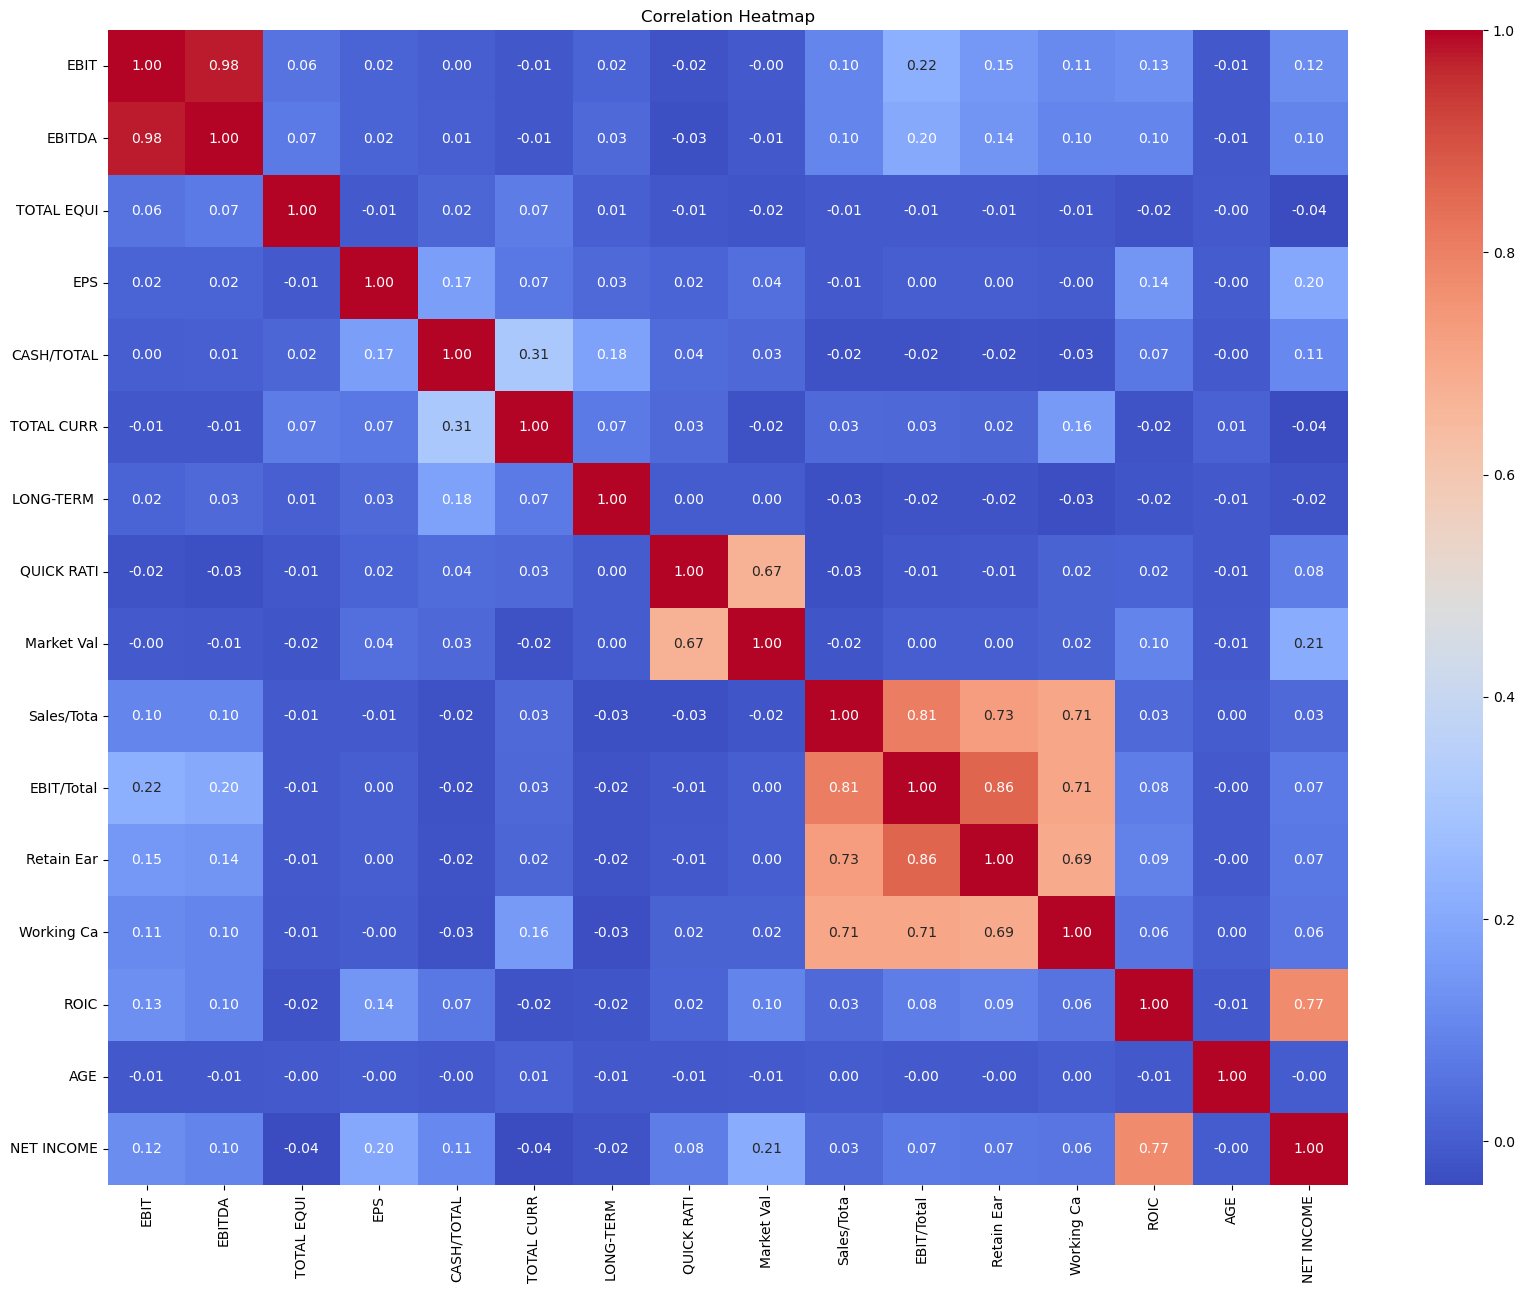

In [29]:
corr_matrix = final_data.drop(['CODE', 'NAME', 'STOCK EXCHANGE', 'YEAR', 'TARGET'], axis=1).corr()
column_names = [col[:10] for col in corr_matrix.columns]
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=column_names, yticklabels=column_names)
plt.title('Correlation Heatmap')
plt.show()


In [30]:
final_data

,CODE,NAME,STOCK EXCHANGE,YEAR,TARGET,EBIT,EBITDA,TOTAL EQUITY/TOTAL ASSETS,EPS,CASH/TOTAL CURRENT ASSETS,...,LONG-TERM ASSETS/TOTAL ASSETS,QUICK RATIO,Market Value of Total Equity / Book Values of Total Liabilities,Sales/Total Assets,EBIT/Total Assets,Retain Earnings/Total Assets,Working Capitals/Total Asset,ROIC,AGE,NET INCOME/TOTAL ASSET
0,AAA,CTCP Nhựa An Phát Xanh,1,2019,1.0,0.142830,0.153395,-0.069445,-0.092052,-0.466714,...,-0.288624,-0.229427,-0.276928,-0.073710,-0.050438,-0.083623,-0.075297,0.075158,17.0,0.078456
1,AAM,CTCP Thủy sản MeKong,1,2019,0.0,-0.187501,-0.208431,-0.069458,-0.102837,-0.466719,...,-0.272364,0.578147,0.402189,-0.155687,-0.097903,-0.111684,-0.147313,-0.421922,17.0,-0.207170
3,AAV,CTCP AAV Group,0,2019,1.0,-0.173981,-0.196400,-0.069405,-0.094713,-0.466713,...,-0.262996,-0.217129,-0.204175,-0.112440,-0.075077,-0.098823,-0.078094,-0.036622,9.0,-0.029983
6,ABT,CTCP Xuất nhập khẩu Thủy sản Bến Tre,1,2019,0.0,-0.169322,-0.192542,-0.069307,-0.074669,-0.466715,...,-0.253317,-0.262222,-0.031056,-0.146436,-0.085947,-0.098861,-0.136635,0.185244,16.0,0.521689
7,ACC,CTCP Đầu tư và Xây dựng Bình Dương ACC,1,2019,1.0,-0.167698,-0.190301,-0.069394,-0.101894,-0.466718,...,-0.280108,-0.120794,-0.249133,-0.157907,-0.097462,-0.111169,-0.161366,0.326662,11.0,0.450760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,IDC,Tổng Công ty IDICO – CTCP,0,2020,1.0,0.113035,0.179507,-0.069471,-0.102522,-0.466700,...,-0.285943,-0.100297,-0.226667,-0.136837,-0.074774,-0.098559,-0.120474,0.277042,10.0,0.111560
578,TTF,CTCP Tập đoàn Kỹ nghệ gỗ Trường Thành,1,2020,1.0,-0.137310,-0.147362,-0.069635,-0.107093,-0.466715,...,-0.293098,-0.393402,-0.258089,-0.119454,-0.070931,-0.589630,-0.402324,0.021960,20.0,-0.516661
315,MCO,CTCP Đầu tư và Xây dựng BDC Việt Nam,0,2022,1.0,-0.191456,-0.212991,-0.069438,-0.106927,0.556032,...,0.237158,-0.241725,-0.299623,-0.120563,-0.097014,-0.092677,-0.136093,-0.626148,20.0,-0.679644
317,MDC,CTCP Than Mông Dương - Vinacomin,0,2022,0.0,-0.131278,-0.129928,-0.069494,-0.098931,-0.414671,...,0.441444,-0.260172,-0.305191,-0.015954,-0.050521,-0.089249,-0.197436,0.390618,21.0,0.137527


In [31]:
final_data.to_csv("final_data.csv", index=False)

In [32]:
final_data.isna().sum()

CODE                                                               0
NAME                                                               0
STOCK EXCHANGE                                                     0
YEAR                                                               0
TARGET                                                             0
EBIT                                                               0
EBITDA                                                             0
TOTAL EQUITY/TOTAL ASSETS                                          0
EPS                                                                0
CASH/TOTAL CURRENT ASSETS                                          0
TOTAL CURRENT ASSET/TOTAL ASSET                                    0
LONG-TERM ASSETS/TOTAL ASSETS                                      0
QUICK RATIO                                                        0
Market Value of Total Equity / Book Values of Total Liabilities    0
Sales/Total Assets                

In [33]:
final_data.columns

Index(['CODE', 'NAME', 'STOCK EXCHANGE', 'YEAR', 'TARGET', 'EBIT', 'EBITDA',
       'TOTAL EQUITY/TOTAL ASSETS', 'EPS', 'CASH/TOTAL CURRENT ASSETS',
       'TOTAL CURRENT ASSET/TOTAL ASSET', 'LONG-TERM ASSETS/TOTAL ASSETS',
       'QUICK RATIO',
       'Market Value of Total Equity / Book Values of Total Liabilities',
       'Sales/Total Assets', 'EBIT/Total Assets',
       'Retain Earnings/Total Assets', 'Working Capitals/Total Asset', 'ROIC',
       'AGE', 'NET INCOME/TOTAL ASSET'],
      dtype='object')